# Challenge: Analyze Rainfall Data and Compute Claims


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the data for analysis 
df = pd.read_excel(r"C:\Users\Rishabh Pandey\Downloads\InRisk_Labs_Assignment.xlsx")


In [3]:
df.head()

,Region,Date,Rainfall_mm
0,Region_A,2024-01-01,4.965
1,Region_A,2024-01-02,27.729
2,Region_A,2024-01-03,12.881
3,Region_A,2024-01-04,32.818
4,Region_A,2024-01-05,36.127


In [14]:
df.isnull() # no missing value in the data set 

,Region,Date,Rainfall_mm
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
450,False,False,False
451,False,False,False
452,False,False,False
453,False,False,False


# checking for missing values 

In [16]:
df[df['Rainfall_mm'].notnull()] # no missing value 

,Region,Date,Rainfall_mm
0,Region_A,2024-01-01,4.965
1,Region_A,2024-01-02,27.729
2,Region_A,2024-01-03,12.881
3,Region_A,2024-01-04,32.818
4,Region_A,2024-01-05,36.127
...,...,...,...
450,Region_E,2024-03-27,13.695
451,Region_E,2024-03-28,36.534
452,Region_E,2024-03-29,82.125
453,Region_E,2024-03-30,95.024


# Dealing with outliers 


<Axes: >

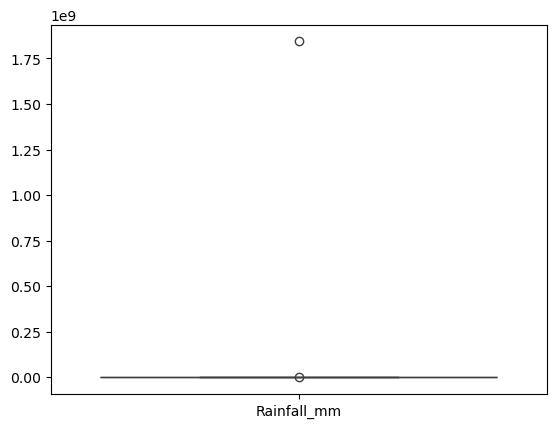

In [3]:
sns.boxplot(df)
#Rainfall Data Overview:
#The x-axis represents Rainfall_mm, which is the variable of interest.
#The y-axis scale indicates values in the range of 0 to 1.8e9 (1.8 billion).
# Box plot 
# Box plot gives us the overall spread of the data  inter quartile range i.e upper quartile(75% of the data)- Lower quartile(25% of the data) as well as the median
# It helps us to find the skewness of the data i.e is it positively skeweed , Negitively Skweed or symmeteric 
# It also helps us to find the outerliers 
# Outliers are that value in the data set which is far from the main distribution i.e either the value is very low or very high as compared to the Data 
#There are two extreme outliers visible:
#One very high value close to 1.8e9.
#One lower but still distinct outlier.
# The lower outlier is not putting that much difference in the analysis .
# But the upper outlier i.e 1.85e^9 is a very big and kind of illogical value according to the data set because the rainfall can never be that much.
# so before staring the analysis we will get rid of this values i.e the outliers
# we will remove the outliers for the further analysid 

In [37]:
threshold_value1 =20000
# I have used the threshold_value1 as 10000 because 
# Highest Average Annual Rainfall
# Mawsynram, India: Mawsynram, a village in the northeastern part of India, holds the record for the highest average annual rainfall in the world. 
# It receives an average of 11,871 mm (467.4 inches) of rainfall annually.
# According to this infoarmation we know that or using the basic logic the maximum ranfall cannot exceeds this value.
threshold_value =0
# For the threshold_value as 0 we know that the rainfall in mm cannot be negative it can be zero means no rainfall has occured in that region.
df_cleaned = df[(df['Rainfall_mm'] >= threshold_value) & (df['Rainfall_mm'] <= threshold_value1)]
df_cleaned 

,Region,Date,Rainfall_mm
0,Region_A,2024-01-01,4.965
1,Region_A,2024-01-02,27.729
2,Region_A,2024-01-03,12.881
3,Region_A,2024-01-04,32.818
4,Region_A,2024-01-05,36.127
...,...,...,...
450,Region_E,2024-03-27,13.695
451,Region_E,2024-03-28,36.534
452,Region_E,2024-03-29,82.125
453,Region_E,2024-03-30,95.024


In [39]:
# The explaition about the removal of the outliers 
# According of this data and the box plot that we have seen in the above code have just 2 or 3 outliers so we have removed it using that 
# But in general it is not the case for removing the outliers using the box plot we have a certain criteria i.e 
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# But this case was very clear beacuse of the domain that was given if we had some other more critical domain it would have been difficult of directly 
# Remove the data 
# We have certain more methods to remove the outlier if the data is normallly distributed then for small data fewer than 80
# lower_bound = mean - 3 * sd
# upper_bound = mean + 3 * sd
# If the sample size is greater than 80 we can use 
# lower_bound = mean - 4* sd
# upper_bound = mean + 4* sd
# just to give more witdh to the values of the data 
# or we can standarized it using the formula x-mean/sd we use (scaling the data)
# lower_bound = mean - 3 * sd
# upper_bound = mean + 3 * sd

<Axes: >

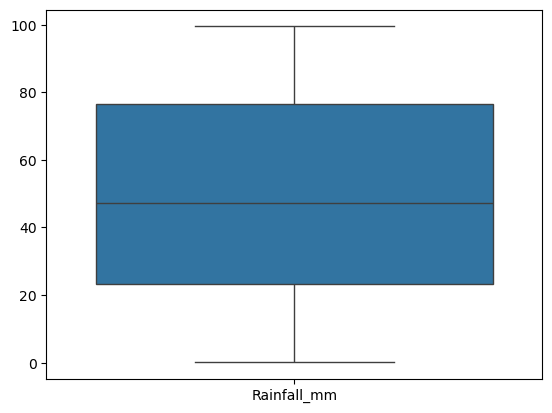

In [173]:
sns.boxplot(df_cleaned)
# From this box plot we can see that there is no outliers in the data which is perfect for the further calculations 
# We can see that the data is positively skeweed 
# we can also see the spread of the data here and the IQR 

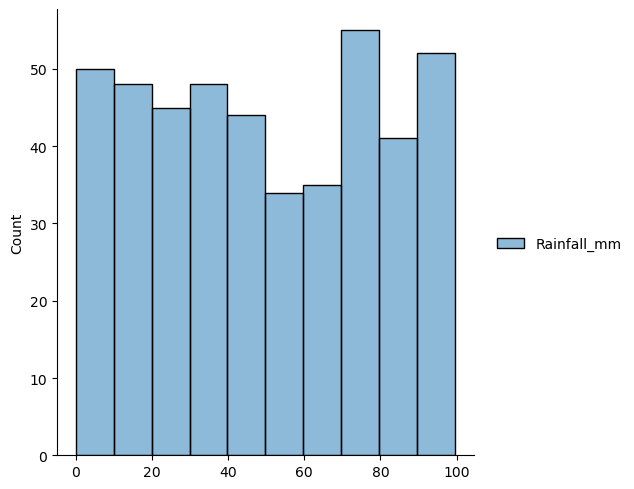

In [175]:
sns.displot(df_cleaned)
# Just to show the distribution of the data.
# The pyhton was not able to plot the histogram of the data without removing of the outliers .
# So we can say that is really important to clean the data before doing any kind of statistical analysis.

# Excess Rainfall Calculation
For each region, compute the number of days where excess rainfall occurred. Excess rainfall is defined as rainfall in mm > 60.

In [51]:
Excess_Rainfall = df_cleaned[df_cleaned['Rainfall_mm'] > 60]
Excess_Rainfall
# we have 182 from 452 days in which there was a excess rainfall


,Region,Date,Rainfall_mm
5,Region_A,2024-01-06,67.575
11,Region_A,2024-01-12,67.890
12,Region_A,2024-01-13,75.535
13,Region_A,2024-01-14,70.623
14,Region_A,2024-01-15,74.195
...,...,...,...
442,Region_E,2024-03-19,66.377
444,Region_E,2024-03-21,78.460
447,Region_E,2024-03-24,89.153
452,Region_E,2024-03-29,82.125


# claim calculation 


In [63]:
# Based on the number of excess rainfall days, calculate the claim for each region using the following slab:
# Excess rainfall days <= 10: No claim
# Excess rainfall days between 11-30: ₹100/day
# Excess rainfall days between 31-50: ₹200/day
# Excess rainfall days >= 51: ₹300/day

In [151]:
Region_A_ER = df_cleaned[(df_cleaned['Region'] == 'Region_A') & (df_cleaned['Rainfall_mm'] > 60)]
Region_A_ER
total_rows = Region_A.shape[0]
total_rows
# This is the total no of days in which there was a excess rainfall i.e 36
# According to the criteria of the claim calculation 
# Excess rainfall days between 31-50: ₹200/day
Excess_rainfall_days_between_31_50 =200
Excess_Rainfall_days_Region_A =total_rows
claim_Amount_Region_A=Excess_rainfall_days_between_31_50*Excess_Rainfall_days_Region_A
claim_Amount_Region_A

7200

In [153]:
Region_B_ER = df_cleaned[(df_cleaned['Region'] == 'Region_B') & (df_cleaned['Rainfall_mm'] > 60)]
Region_B_ER
total_rows = Region_B_ER.shape[0]
total_rows
# This is the total no of days in which there was a excess rainfall i.e 37
# According to the criteria of the claim calculation 
# Excess rainfall days between 31-50: ₹200/day
Excess_rainfall_days_between_31_50 = 200
Excess_Rainfall_days_Region_B = total_rows
claim_Amount_Region_B = Excess_rainfall_days_between_31_50*Excess_Rainfall_days_Region_B
claim_Amount_Region_B

7400

In [135]:
Region_C_ER = df_cleaned[(df_cleaned['Region'] == 'Region_C') & (df_cleaned['Rainfall_mm'] > 60)]
Region_C_ER
total_rows = Region_C_ER.shape[0]
total_rows
# This is the total no of days in which there was a excess rainfall i.e 43
# According to the criteria of the claim calculation 
# Excess rainfall days between 31-50: ₹200/day
Excess_rainfall_days_between_31_50 = 200
Excess_Rainfall_days_Region_C = total_rows
claim_Amount_Region_C = Excess_rainfall_days_between_31_50*Excess_Rainfall_days_Region_C
claim_Amount_Region_C

8600

In [155]:
Region_D_ER = df_cleaned[(df_cleaned['Region'] == 'Region_D') & (df_cleaned['Rainfall_mm'] > 60)]
Region_D_ER
total_rows = Region_D_ER.shape[0]
total_rows
# This is the total no of days in which there was a excess rainfall i.e 43
# According to the criteria of the claim calculation 
# Excess rainfall days between 31-50: ₹200/day
Excess_rainfall_days_between_31_50 = 200
Excess_Rainfall_days_Region_D = total_rows
claim_Amount_Region_D = Excess_rainfall_days_between_31_50*Excess_Rainfall_days_Region_D
claim_Amount_Region_D

7000

In [157]:
Region_E_ER = df_cleaned[(df_cleaned['Region'] == 'Region_E') & (df_cleaned['Rainfall_mm'] > 60)]
Region_E_ER
total_rows = Region_E_ER.shape[0]
total_rows
# This is the total no of days in which there was a excess rainfall i.e 43
# According to the criteria of the claim calculation 
# Excess rainfall days between 31-50: ₹200/day
Excess_rainfall_days_between_31_50 = 200
Excess_Rainfall_days_Region_E = total_rows
claim_Amount_Region_E = Excess_rainfall_days_between_31_50*Excess_Rainfall_days_Region_E
claim_Amount_Region_E

6200

# Above Process using Loop so that we can convert the output in a table form.

In [168]:
import pandas as pd

# Initialize an empty list to store the results
claims_data = []

# Loop through each unique region
for region in df_cleaned['Region'].unique():
    # Filter the DataFrame for the current region and rainfall > 60
    Region_ER = df_cleaned[(df_cleaned['Region'] == region) & (df_cleaned['Rainfall_mm'] > 60)]
    
    # Count the number of excess rainfall days
    excess_rainfall_days = len(Region_ER)
    
    # Calculate the claim based on the number of excess rainfall days
    if excess_rainfall_days <= 10:
        claim = 0  # No claim
    elif 11 <= excess_rainfall_days <= 30:
        claim = excess_rainfall_days * 100  # ₹100/day
    elif 31 <= excess_rainfall_days <= 50:
        claim = excess_rainfall_days * 200  # ₹200/day
    else:  # excess_rainfall_days >= 51
        claim = excess_rainfall_days * 300  # ₹300/day
    
    # Append the region, excess rainfall days, and claim to the list
    claims_data.append([region, excess_rainfall_days, claim])

# Create a DataFrame from the list
claims_df = pd.DataFrame(claims_data, columns=['Region', 'Excess Rainfall Days', 'Claim (₹)'])

# Display the resulting DataFrame
print(claims_df)


     Region  Excess Rainfall Days  Claim (₹)
0  Region_A                    36       7200
1  Region_B                    37       7400
2  Region_C                    43       8600
3  Region_D                    35       7000
4  Region_E                    31       6200
